# Data anlysis
0.import librariy
1.load the data
2.check the data and undersatnd
3.preprocess the data
4.explore the data 
5. visualize the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('data/movies_datasets.csv')

In [3]:
df

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [4]:
df.isnull().sum()

id                   0
original_language    0
original_title       0
overview             6
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   overview           9994 non-null   object 
 4   popularity         10000 non-null  float64
 5   release_date       10000 non-null  object 
 6   title              10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [6]:
df.rename(mapper={
        'original_language':'Language',
        'original_title':'Movies_title'
        },axis=1, inplace=True)

In [7]:
df

,id,Language,Movies_title,overview,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,Yeon-du asks her best friend Bora to collect a...,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,"Matilde is a woman who, after the death of her...",32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,"Joe Gavilan and his new partner K. C. Calden, ...",9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,"Michel, who's crazy about jazz, has just found...",5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,"Officially, Apollo 17 was the last manned miss...",51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,A team of parapsychologists sets out to invest...,6.226,2011-10-11,Apartment 143,5.3,242


In [8]:
cols_to_drop = ['overview']
df.drop(columns= cols_to_drop, inplace=True)

In [9]:
df

,id,Language,Movies_title,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,6.226,2011-10-11,Apartment 143,5.3,242


In [10]:
df.Language.value_counts().head()

en    7736
fr     678
it     430
ja     288
es     203
Name: Language, dtype: int64

In [11]:
df.Language.value_counts().tail(5)

vi    1
nb    1
he    1
km    1
xx    1
Name: Language, dtype: int64

In [12]:
cnt= Counter()
for text in df['title'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common()

[('The', 2282),
 ('the', 953),
 ('of', 917),
 ('and', 315),
 ('in', 248),
 ('A', 245),
 ('a', 196),
 ('to', 192),
 ('2', 160),
 ('Man', 152),
 ('&', 120),
 ('My', 116),
 ('Love', 111),
 ('I', 111),
 ('on', 95),
 ('You', 88),
 ('for', 85),
 ('Last', 81),
 ('Movie', 80),
 ('Life', 80),
 ('Night', 80),
 ('Me', 76),
 ('with', 69),
 ('Dead', 67),
 ('Day', 67),
 ('Black', 64),
 ('Christmas', 63),
 ('One', 62),
 ('In', 62),
 ('House', 61),
 ('Little', 60),
 ('Girl', 59),
 ('II', 56),
 ('Time', 56),
 ('All', 55),
 ('Red', 54),
 ('Is', 53),
 ('It', 53),
 ('Death', 53),
 ('Story', 52),
 ('World', 51),
 ('New', 51),
 ('from', 51),
 ('Big', 51),
 ('Dragon', 51),
 ('Part', 49),
 ('King', 49),
 ('3', 49),
 ('2:', 49),
 ('War', 48),
 ('Return', 47),
 ('Dark', 46),
 ('Days', 46),
 ('Bad', 44),
 ('American', 44),
 ('Good', 44),
 ('at', 44),
 ('White', 42),
 ('City', 41),
 ('Out', 41),
 ('No', 41),
 ('Men', 39),
 ('Star', 39),
 ('Your', 38),
 ('Who', 38),
 ('First', 38),
 ('Two', 37),
 ('Lost', 37),
 ('

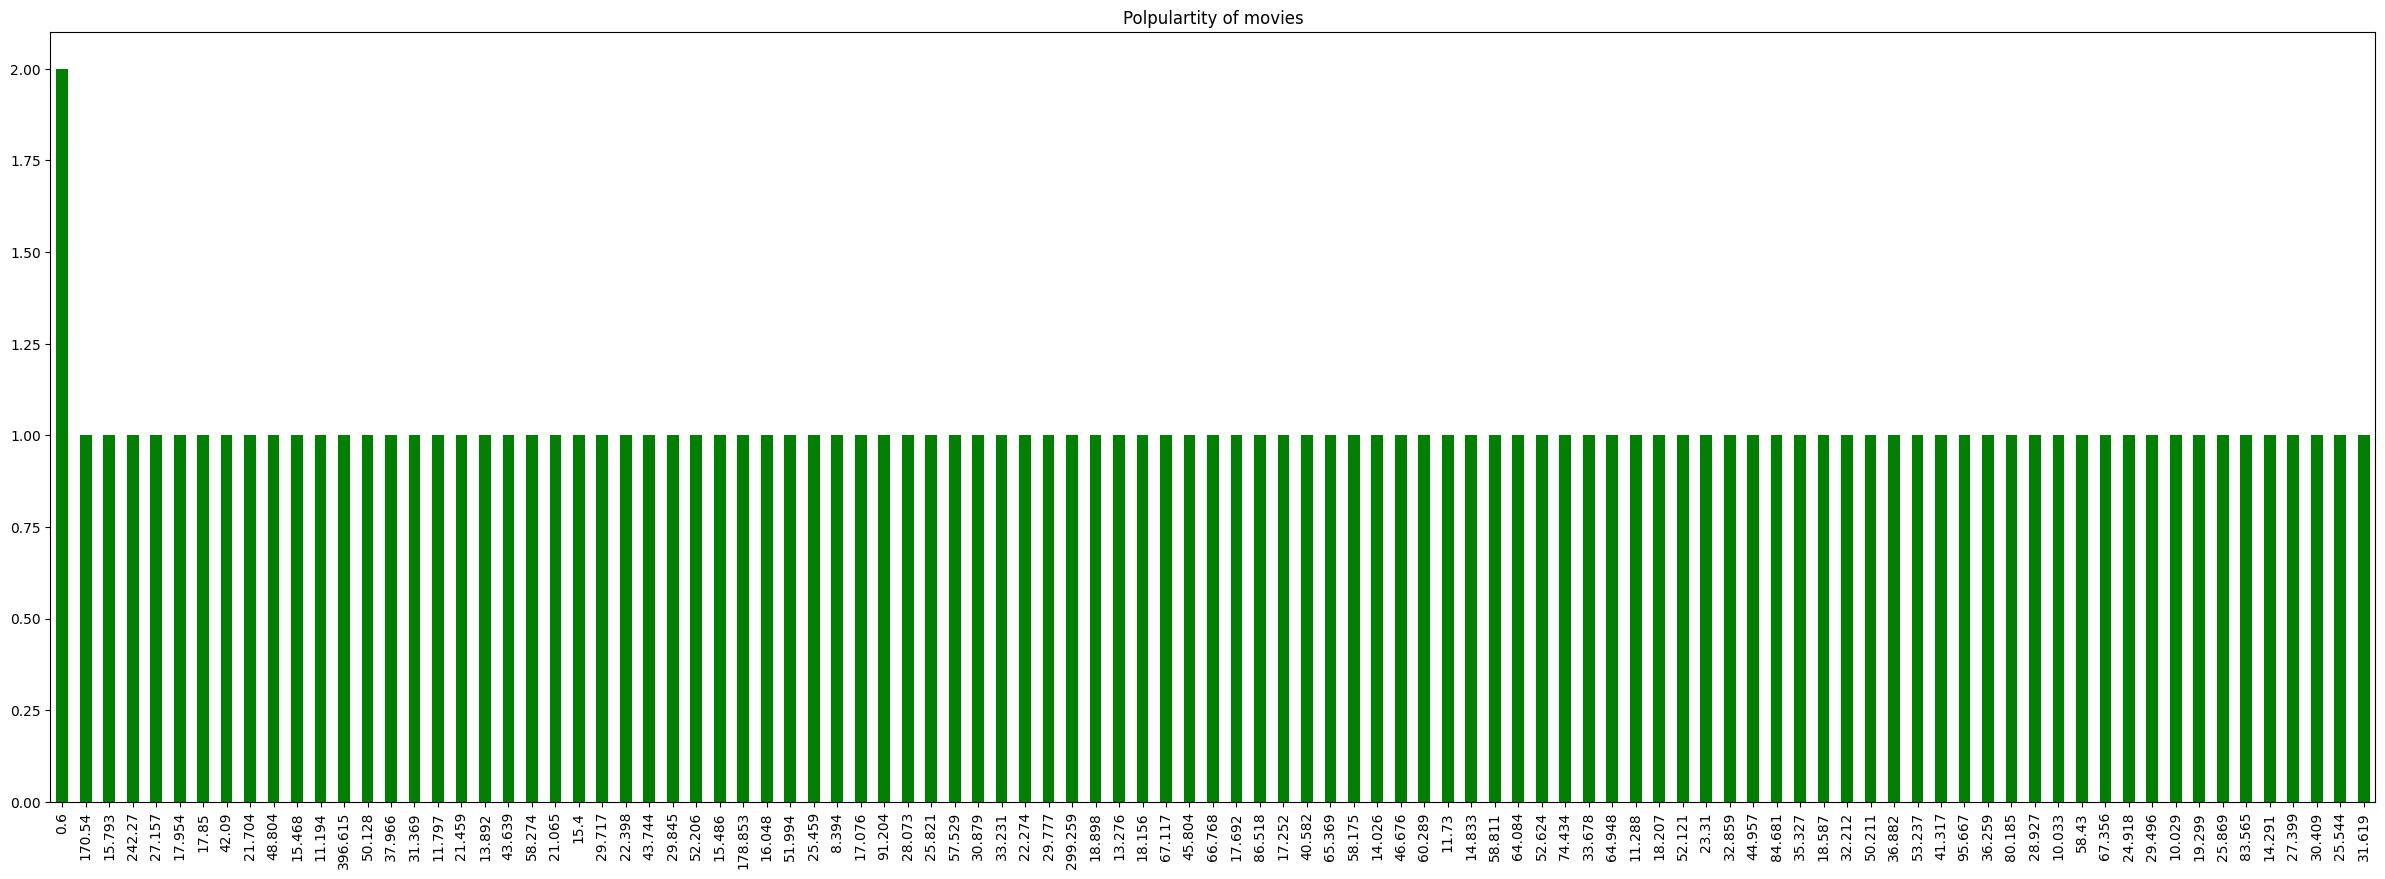

In [13]:
df['popularity'].head(100).value_counts().plot(kind='bar', figsize=(30, 10), color='green', title='Polpulartity of movies')
plt.show()

In [14]:
df['popularity'].max()

9137.939

<AxesSubplot: ylabel='Frequency'>

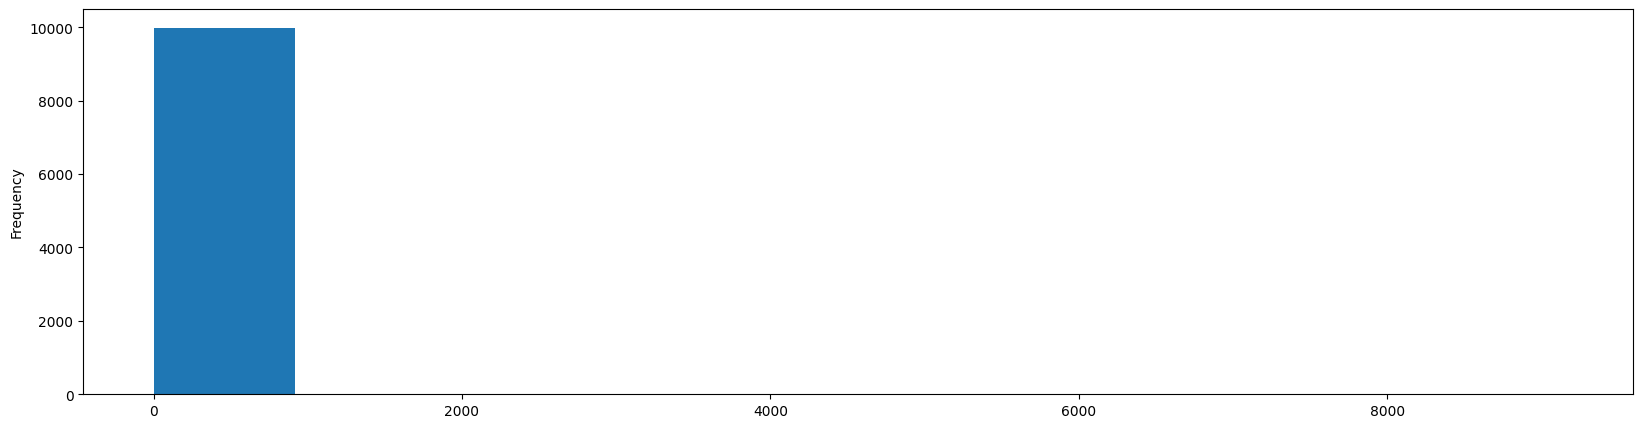

In [15]:
df['popularity'].plot(kind='hist', figsize=(20, 5))

<AxesSubplot: >

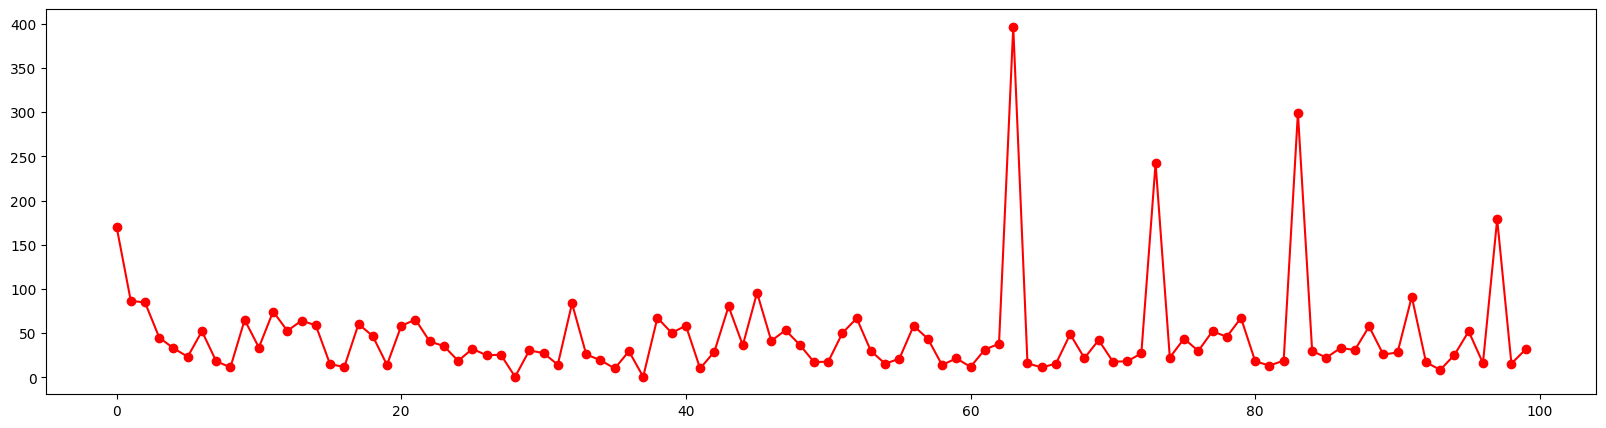

In [16]:
df['popularity'].head(100).plot(kind='line',figsize=(20,5),style='ro-',)

In [17]:
df.columns

Index(['id', 'Language', 'Movies_title', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [18]:
df.popularity

0       170.540
1        86.518
2        84.681
3        44.957
4        32.859
         ...   
9995      9.532
9996      5.835
9997     51.415
9998      6.226
9999      9.630
Name: popularity, Length: 10000, dtype: float64

In [19]:
df.vote_average

0       8.7
1       8.7
2       8.7
3       8.6
4       8.6
       ... 
9995    5.3
9996    5.3
9997    5.3
9998    5.3
9999    5.3
Name: vote_average, Length: 10000, dtype: float64

In [20]:
df.isnull().sum()

id              0
Language        0
Movies_title    0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

In [21]:
xd = df['release_date'].value_counts(100)

In [22]:
df.release_date = pd.to_datetime(df.release_date)

In [23]:
year_df = df.release_date.dt.year

In [24]:
year_df.head()

0    2022
1    1972
2    1994
3    1974
4    2021
Name: release_date, dtype: int64

In [25]:
import plotly.express as px

In [26]:
year_df = df.groupby(df.release_date.dt.year)['title'].count().reset_index()
year_df.columns = ['year','movies count']
px.bar(year_df, 'year', 'movies count', title='Movies released per year 1900-2022')

In [27]:
px.scatter(df, 'popularity', 'vote_average' )


In [28]:
px.scatter(df, 'vote_average','vote_count')

In [29]:
year_df = df.groupby(df.release_date.dt.year)['vote_average'].mean().reset_index()
year_df.columns = ['years','vote_average']
px.bar(year_df,'years','vote_average', title="vote average per years")

In [30]:
year_df = df.groupby(df.release_date.dt.year)['popularity'].mean().reset_index()
year_df.columns = ['years','popularity']
px.bar(year_df,'years','popularity', title="popularity per years")

In [31]:
df

,id,Language,Movies_title,popularity,release_date,title,vote_average,vote_count
0,851644,ko,20세기 소녀,170.540,2022-10-06,20th Century Girl,8.7,290
1,238,en,The Godfather,86.518,1972-03-14,The Godfather,8.7,16988
2,278,en,The Shawshank Redemption,84.681,1994-09-23,The Shawshank Redemption,8.7,22748
3,240,en,The Godfather Part II,44.957,1974-12-20,The Godfather Part II,8.6,10293
4,667257,es,Cosas imposibles,32.859,2021-06-17,Impossible Things,8.6,299
...,...,...,...,...,...,...,...,...
9995,11375,en,Hollywood Homicide,9.532,2003-06-09,Hollywood Homicide,5.3,529
9996,298614,fr,Une heure de tranquillité,5.835,2014-12-31,Do Not Disturb,5.3,304
9997,50357,en,Apollo 18,51.415,2011-07-20,Apollo 18,5.3,839
9998,97795,en,Emergo,6.226,2011-10-11,Apartment 143,5.3,242


In [32]:
px.scatter(df,'Language','Movies_title')

In [33]:
df.columns

Index(['id', 'Language', 'Movies_title', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [34]:
df['Language'].value_counts().head()

en    7736
fr     678
it     430
ja     288
es     203
Name: Language, dtype: int64

In [35]:
df_language

NameError: name 'df_language' is not defined